# Convergence plots

In [1]:
# Directives on Jupyter
%reset
# Auto reload bootstrap.py
%load_ext autoreload
%autoreload 2

import numpy as np

Nothing done.


V = [-35.09276912 -36.47123987 -36.50406209 -36.50624561 -36.50624561
 -36.50406209 -36.47123987 -35.09276912]
t = [0.62065988 0.50139018 0.49634266 0.49601698 0.49634266 0.50139018
 0.62065988]
U = [0.9155691  0.83789817 0.81464502 0.82401391 0.82401391 0.81464502
 0.83789817 0.9155691 ]
V_err = 0.016789812604312948
t_err = 0.10373867367197544
U_err = 0.047003838469957204


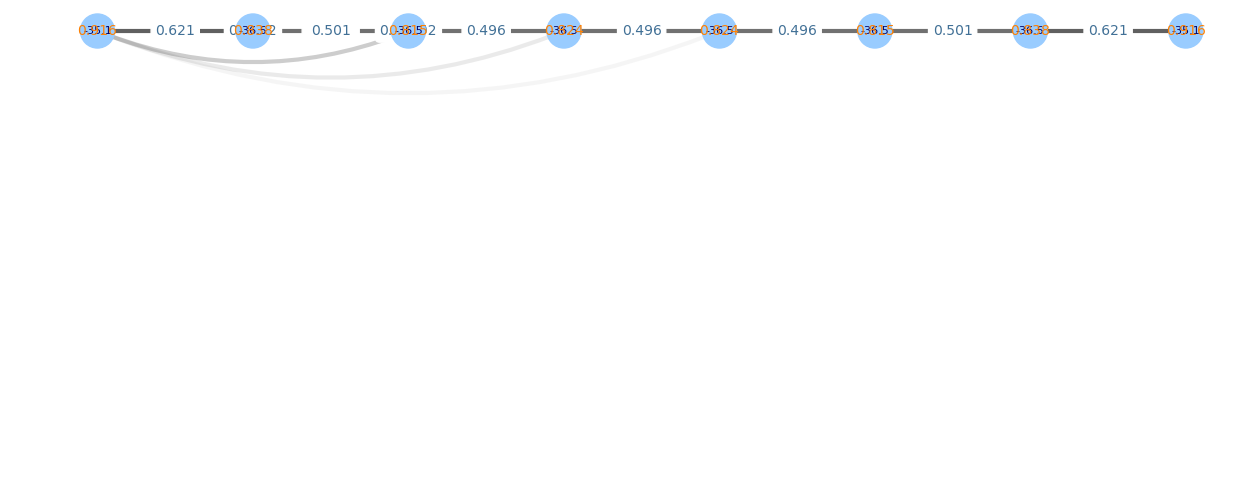

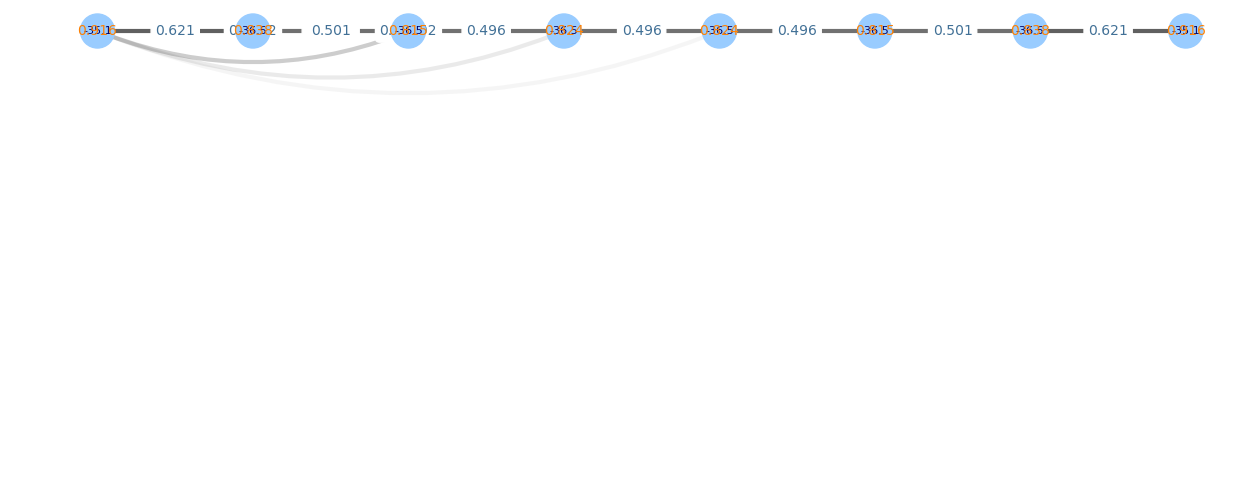

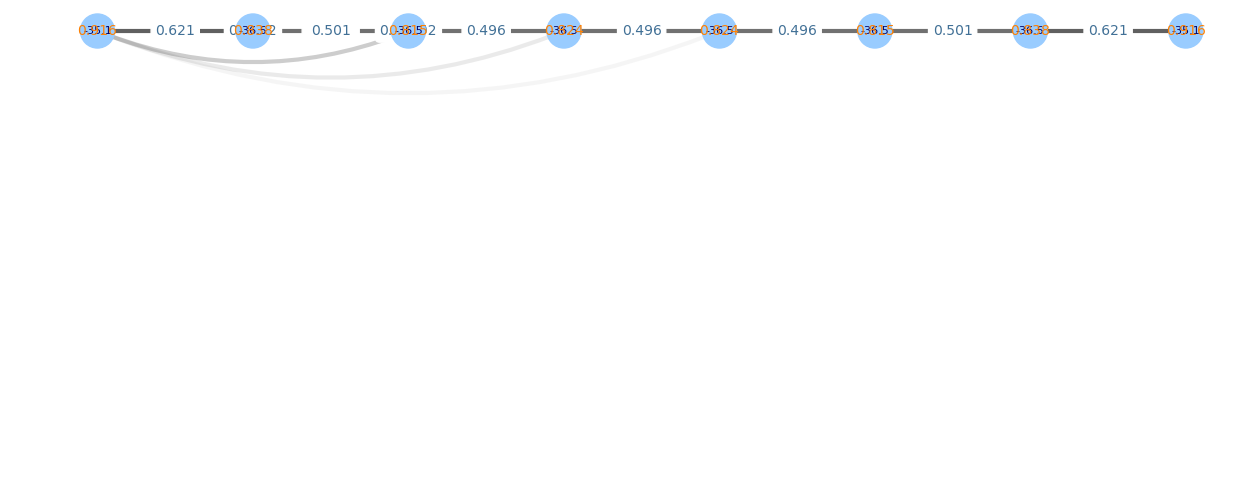

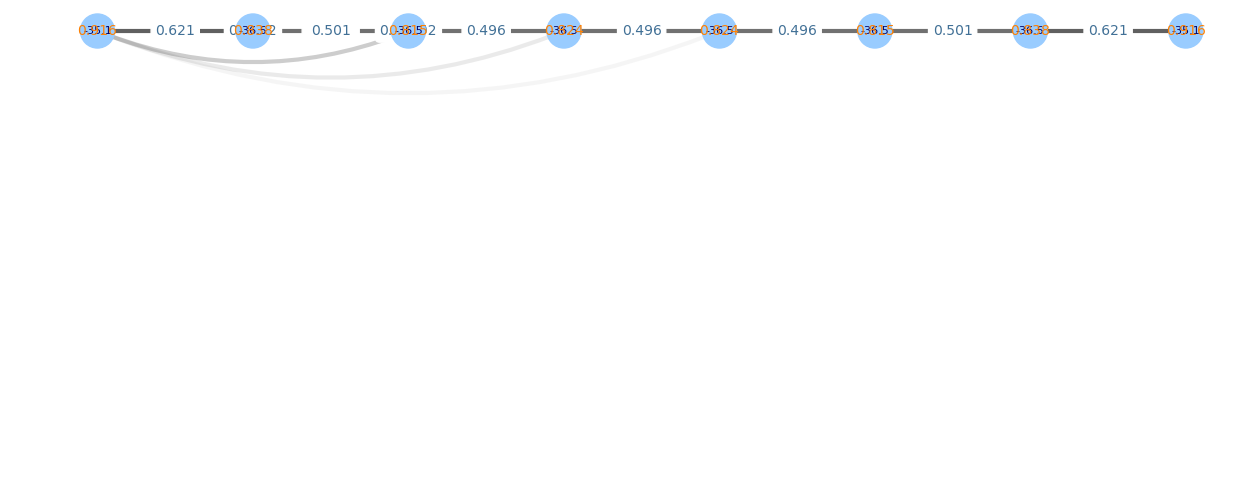

In [3]:
from Hubbard.plot import *
import numpy as np
from Hubbard.output import *

N = 20
d = 3
L = 8
R0 = np.array([3, 3, 7.2])
for N in range(16, 24, 2):
    G = HubbardGraph(N,
                    R0=R0,
                    lattice=np.array([L], dtype=int),
                    laser=770,
                    trap=(50, (930, 1250)),
                    lc=(1350, 1550),
                    band=1,
                    dim=d,
                    sparse=True,
                    equalize=False,
                    symmetry=True,
                    verbosity=0)

    fn = f'../data/convergence/N/{d}D_{L}x1_N{N}.ini'
    report = rep.get_report(fn)
    G.U, G.A = read_parameters(report)
    G.draw_graph(nnn=True, A=G.A, U=G.U)
print(f'V = {np.diag(G.A)}')
t = abs(G.nn_tunneling(G.A))
print(f't = {t}')
print(f'U = {G.U}')
print(f'V_err = {G.v_cost_func(G.A, None)}')
print(f't_err = {G.t_cost_func(G.A, None, None)}')
print(f'U_err = {G.u_cost_func(G.U, None)}')


V = [-35.09276912 -36.47123987 -36.50406209 -36.50624561 -36.50624561
 -36.50406209 -36.47123987 -35.09276912]
t = [0.62065988 0.50139018 0.49634266 0.49601698 0.49634266 0.50139018
 0.62065988]
U = [0.91556906 0.83789818 0.81464505 0.82401393 0.82401393 0.81464505
 0.83789818 0.91556906]
V_err = 0.016789812604282264
t_err = 0.10373867367097549
U_err = 0.04700380646596995


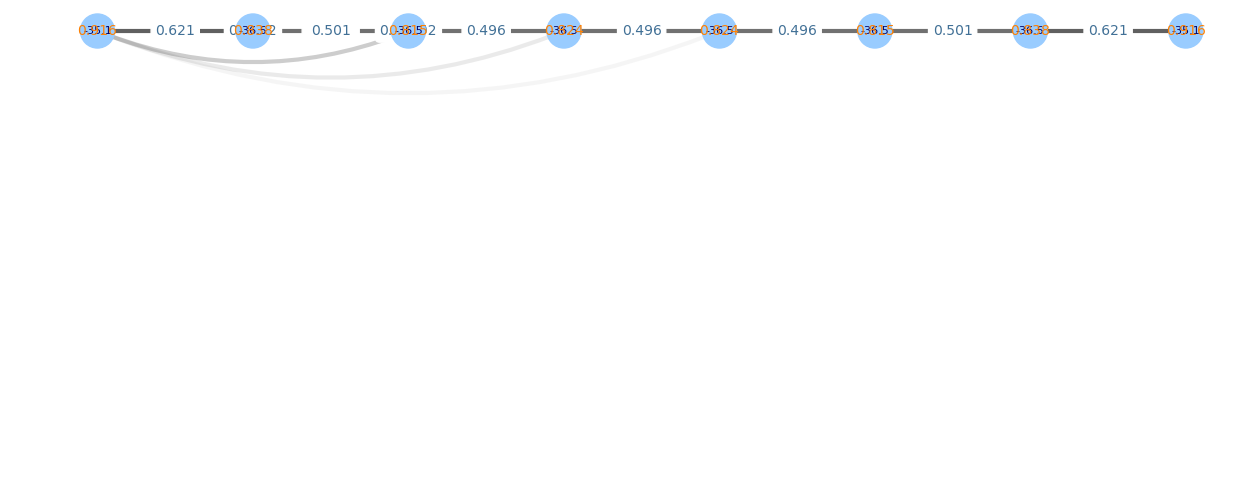

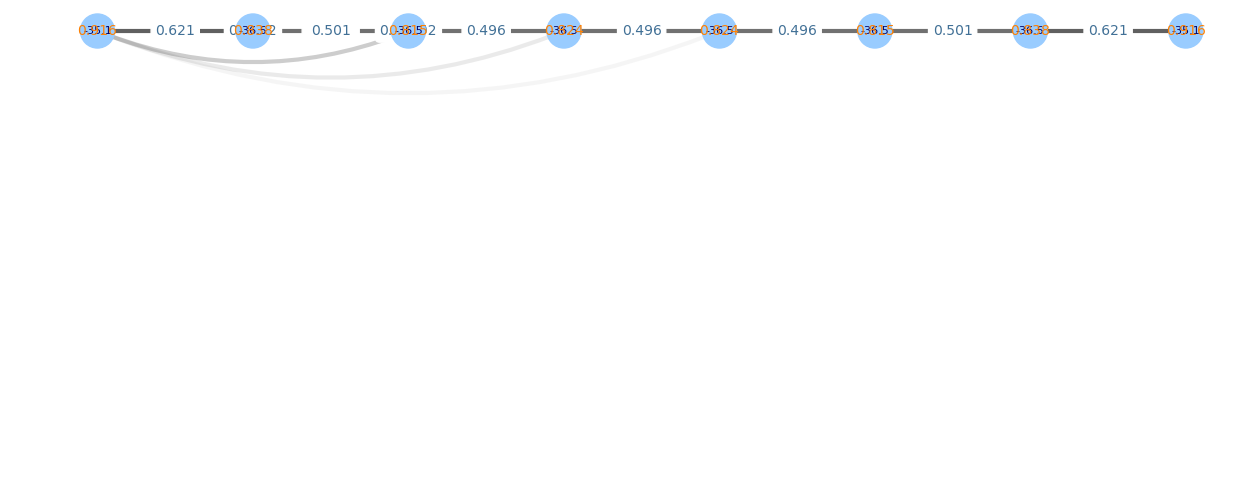

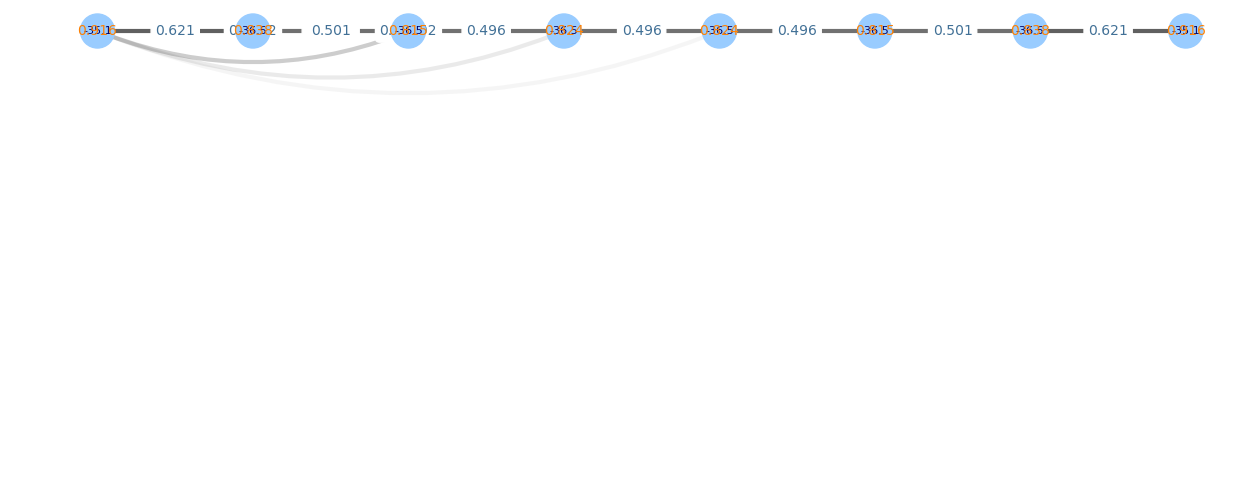

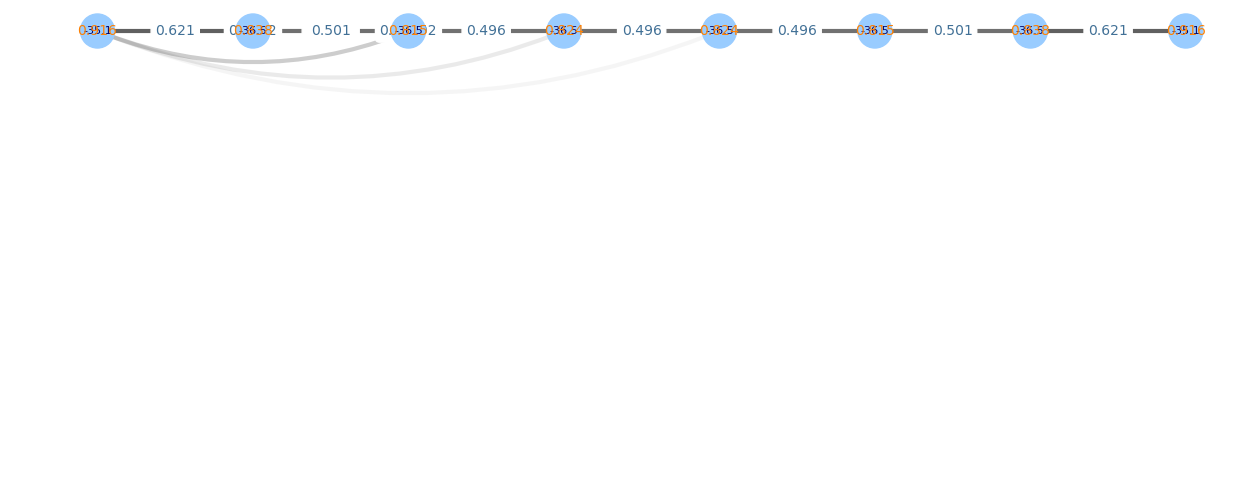

In [2]:
from Hubbard.plot import *
import numpy as np
from Hubbard.output import *

N = 20
d = 3
L = 8
R0 = np.array([3, 3, 7.2])
for r in range(16, 24, 2):
    R0 = np.array([1, 1, 2.4]) * r * 18/3
    G = HubbardGraph(N,
                     R0=R0,
                     lattice=np.array([L], dtype=int),
                     laser=770,
                     trap=(50, (930, 1250)),
                     lc=(1350, 1550),
                     band=1,
                     dim=d,
                     sparse=True,
                     equalize=False,
                     symmetry=True,
                     verbosity=0)

    fn = f'../data/convergence/N/{d}D_{L}x1_N{N}.ini'
    report = rep.get_report(fn)
    G.U, G.A = read_parameters(report)
    G.draw_graph(nnn=True, A=G.A, U=G.U)
print(f'V = {np.diag(G.A)}')
t = abs(G.nn_tunneling(G.A))
print(f't = {t}')
print(f'U = {G.U}')
print(f'V_err = {G.v_cost_func(G.A, None)}')
print(f't_err = {G.t_cost_func(G.A, None, None)}')
print(f'U_err = {G.u_cost_func(G.U, None)}')
